Downloading and installing necessary packages

In [ ]:
!pip install osm-flex
!pip install osmosis
!pip install rasterstats
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 781.4 kB/s eta 0:00:00
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (13.8 MB)
Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (24.6 MB)
Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (883 kB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl (211

In [ ]:
# Loading necessary data packages
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rioxarray as rxr
from rasterstats import zonal_stats
from shapely.geometry import Point
from shapely.geometry import LineString

# Importing necessary libraries
# sys.path.append('') #'your-path-to/osm-flex/src'

import osm_flex
import osm_flex.download as dl
import osm_flex.extract as ex
import osm_flex.config
import osm_flex.clip as cp

osm_flex.enable_logs()

1. Using the OSM Flex package to download the Road Network for Spain

In [ ]:
# Download the Spain country file from download.geofabrik.de
# Saving the reprojected raster to a new file
iso3 = 'ESP'
path_esp_dump = dl.get_country_geofabrik(iso3)
print(f'Saved as {path_esp_dump}')

INFO:osm_flex.download:Download file: /root/osm/osm_bpf/spain-latest.osm.pbf


Saved as /root/osm/osm_bpf/spain-latest.osm.pbf


In [ ]:
# available dictionary keys:
osm_flex.config.DICT_CIS_OSM.keys()

dict_keys(['education', 'healthcare', 'water', 'telecom', 'road', 'main_road', 'rail', 'air', 'gas', 'oil', 'power', 'wastewater', 'food', 'buildings'])

In [ ]:
# Convert the osm_flex CI dictionary into a Pandas DataFrame for easier exploration of the available CI keys (categories).
DICT_CIS_OSM = pd.DataFrame(osm_flex.config.DICT_CIS_OSM)

# Display the first few rows of the DataFrame to preview its structure and the CI keys it contains.
DICT_CIS_OSM.head()

,education,healthcare,water,telecom,road,main_road,rail,air,gas,oil,power,wastewater,food,buildings
osm_keys,"[amenity, building, name]","[amenity, building, healthcare, name]","[man_made, pump, pipeline, emergency, name]","[man_made, tower_type, telecom, communication_...","[highway, name, maxspeed, lanes, surface]","[highway, name, maxspeed, lanes, surface]","[railway, name, gauge, electrified, voltage]","[aeroway, name]","[man_made, pipeline, utility, name]","[pipeline, man_made, amenity, name]","[power, voltage, utility, name]","[reservoir_type, man_made, utility, natural, n...","[shop, name]","[building, amenity, name]"
osm_query,building='school' or amenity='school' or\n ...,amenity='hospital' or healthcare='hospital' or...,man_made='water_well' or man_made='water_works...,tower_type='communication' or man_made='mast' ...,"highway in ('motorway', 'motorway_link', 'trun...","highway in ('primary', 'primary_link', 'second...",railway='rail' or railway='tram' or\n ...,aeroway='aerodrome',(man_made='pipeline' and substance='gas') or\n...,(pipeline='substation' and substance='oil') or...,power='line' or power='cable' or\n ...,reservoir_type='sewage' or\n ...,shop='supermarket' or shop='greengrocer' or\n ...,building='yes' or building='house' or \n ...


In [ ]:
gdf_esp_road = ex.extract_cis(path_esp_dump,'road')

# Drop rows where geometry type is not LineString
gdf_esp_road = gdf_esp_road[gdf_esp_road.geometry.geom_type == 'LineString']

INFO:osm_flex.extract:query is finished, lets start the loop
extract points: 0it [00:33, ?it/s]
INFO:osm_flex.extract:query is finished, lets start the loop
extract multipolygons: 100%|██████████| 1573/1573 [03:53<00:00,  6.74it/s]
INFO:osm_flex.extract:query is finished, lets start the loop
extract lines: 100%|██████████| 2032988/2032988 [03:57<00:00, 8576.89it/s]


In [ ]:
Spain_Roads = pd.DataFrame(gdf_esp_road)
Spain_Roads = Spain_Roads.rename(columns={'geometry': 'Geometry_LineString'})

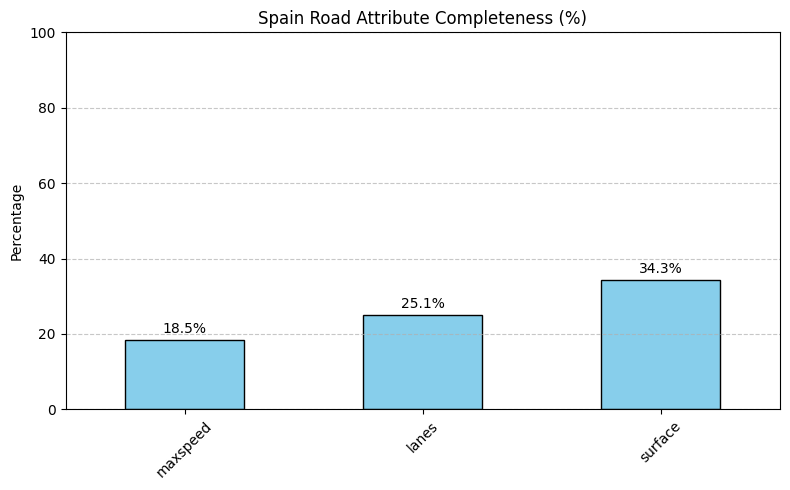

In [ ]:
# Assign DataFrame for easier handling
df_SpainRoads = Spain_Roads

# Columns of interest
columns = ['maxspeed', 'lanes', 'surface']

# Calculate completeness (non-null percentage)
completeness = df_SpainRoads[columns].notnull().mean() * 100

# Plot
plt.figure(figsize=(8, 5))
completeness.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Spain Road Attribute Completeness (%)')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for idx, val in enumerate (completeness):
    plt.text(idx, val + 1, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
gdf_esp_mainroad = ex.extract_cis(path_esp_dump, 'main_road')

# Drop rows where geometry type is not LineString
gdf_esp_mainroad = gdf_esp_mainroad[gdf_esp_mainroad.geometry.geom_type == 'LineString']

INFO:osm_flex.extract:query is finished, lets start the loop
extract points: 0it [00:33, ?it/s]
INFO:osm_flex.extract:query is finished, lets start the loop
extract multipolygons: 100%|██████████| 3/3 [06:34<00:00, 131.38s/it]
INFO:osm_flex.extract:query is finished, lets start the loop
extract lines: 100%|██████████| 654512/654512 [03:37<00:00, 3007.15it/s] 


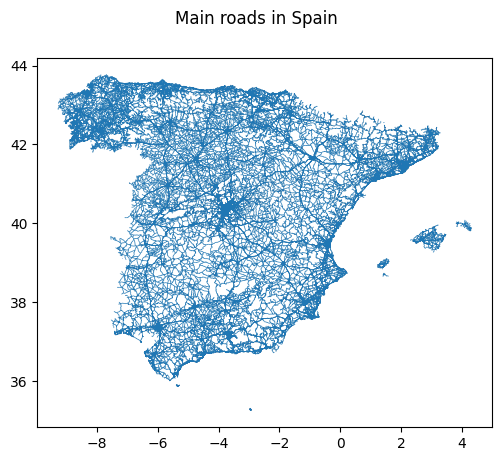

In [ ]:
fig, ax = plt.subplots()
gdf_esp_mainroad.plot(ax=ax, linewidth=0.5)
fig.suptitle('Main roads in Spain')
plt.show()

In [ ]:
Spain_RoadNetwork = pd.DataFrame(gdf_esp_mainroad)
Spain_RoadNetwork = Spain_RoadNetwork.rename(columns={'geometry': 'Geometry_LineString'})

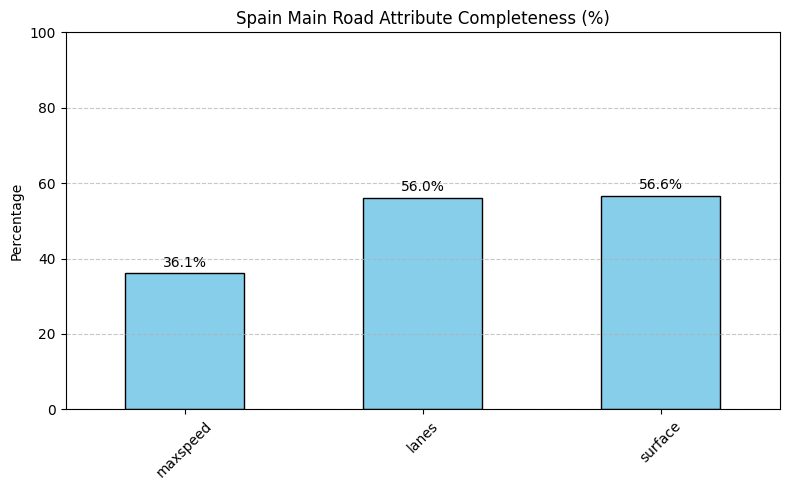

In [ ]:
# Assign DataFrame for easier handling
df_Spain = Spain_RoadNetwork
df_Spain['ID'] = pd.RangeIndex(start=1, stop=len(df_Spain) + 1)  # Create a new 'id' column
df_Spain = df_Spain.set_index('ID')  # Set 'id' as the index

# Columns of interest
columns = ['maxspeed', 'lanes', 'surface']

# Calculate completeness (non-null percentage)
completeness = df_Spain[columns].notnull().mean() * 100

# Plot
plt.figure(figsize=(8, 5))
completeness.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Spain Main Road Attribute Completeness (%)')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for idx, val in enumerate (completeness):
    plt.text(idx, val + 1, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

2. Clipping to Specific Regions of Interest

In [ ]:
# Obtain the region polygons
admin_1_esp = cp.get_admin1_shapes('ESP')
admin_1_esp.keys()

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


dict_keys(['Ceuta', 'Melilla', 'Navarre', 'Gipuzkoa', 'Huesca', 'Lleida', 'Girona', 'Badajoz', 'Cádiz', 'Ourense', 'Cáceres', 'Salamanca', 'Zamora', 'Pontevedra', 'Huelva', 'Barcelona', 'Tarragona', 'Castellón', 'Valencia', 'Alicante', 'Murcia', 'Almería', 'Granada', 'Málaga', 'Seville', 'A Coruña', 'Lugo', 'Asturias', 'Cantabria', 'Biscay', 'Santa Cruz de Tenerife', 'Las Palmas', 'Balearic Islands', 'Zaragoza', 'La Rioja', 'Araba / Álava', 'Albacete', 'Teruel', 'Cuenca', 'Toledo', 'León', 'Soria', 'Burgos', 'Ávila', 'Palencia', 'Ciudad Real', 'Córdoba', 'Guadalajara', 'Jaén', 'Community of Madrid', 'Segovia', 'Valladolid'])

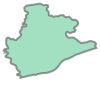

In [ ]:
Malaga_shp = admin_1_esp['Málaga']
Malaga_shp

Barcelona_shp = admin_1_esp['Barcelona']
Barcelona_shp

In [ ]:
# Clip the region polygon:
cp.clip_from_shapes([Malaga_shp],
                    osmpbf_output=osm_flex.config.OSM_DATA_DIR.joinpath('Malaga.osm.pbf'),
                    osmpbf_clip_from=path_esp_dump,
                    kernel='osmosis', overwrite=True)

# Clip the region polygon:
cp.clip_from_shapes([Barcelona_shp],
                    osmpbf_output=osm_flex.config.OSM_DATA_DIR.joinpath('Barcelona.osm.pbf'),
                    osmpbf_clip_from=path_esp_dump,
                    kernel='osmosis', overwrite=True)

INFO:osm_flex.clip:File doesn`t yet exist or overwriting old one.
                    Assembling osmosis command.
INFO:osm_flex.clip:Extracting from larger file...
                    This will take a while
INFO:osm_flex.clip:File doesn`t yet exist or overwriting old one.
                    Assembling osmosis command.
INFO:osm_flex.clip:Extracting from larger file...
                    This will take a while


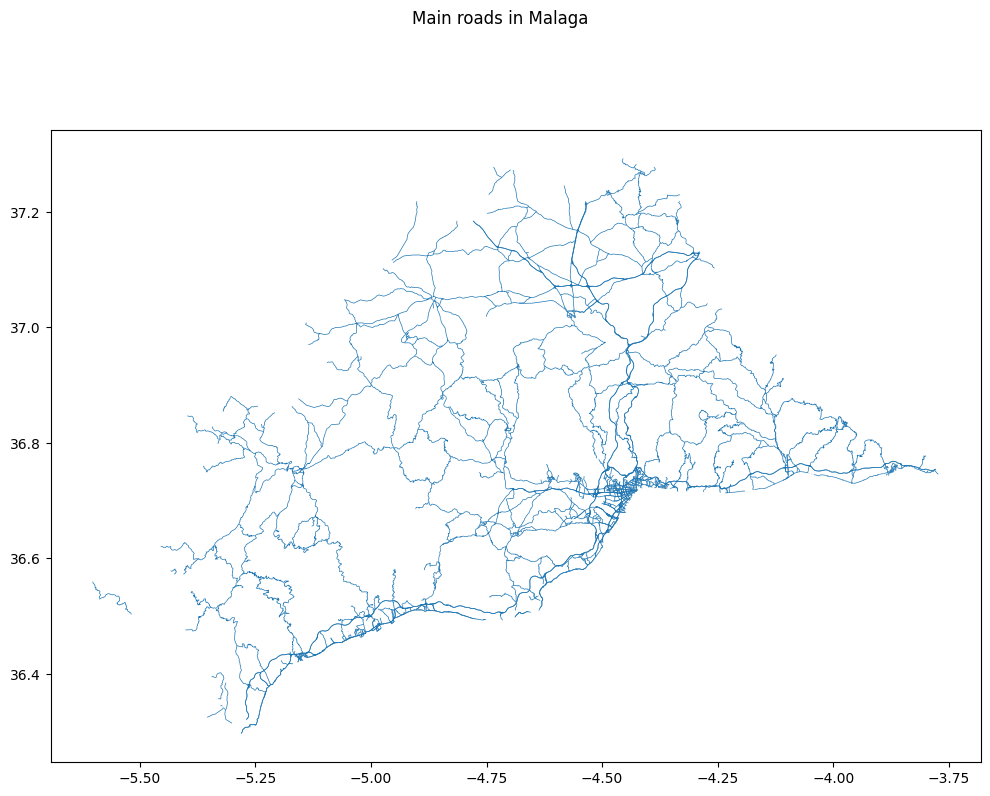

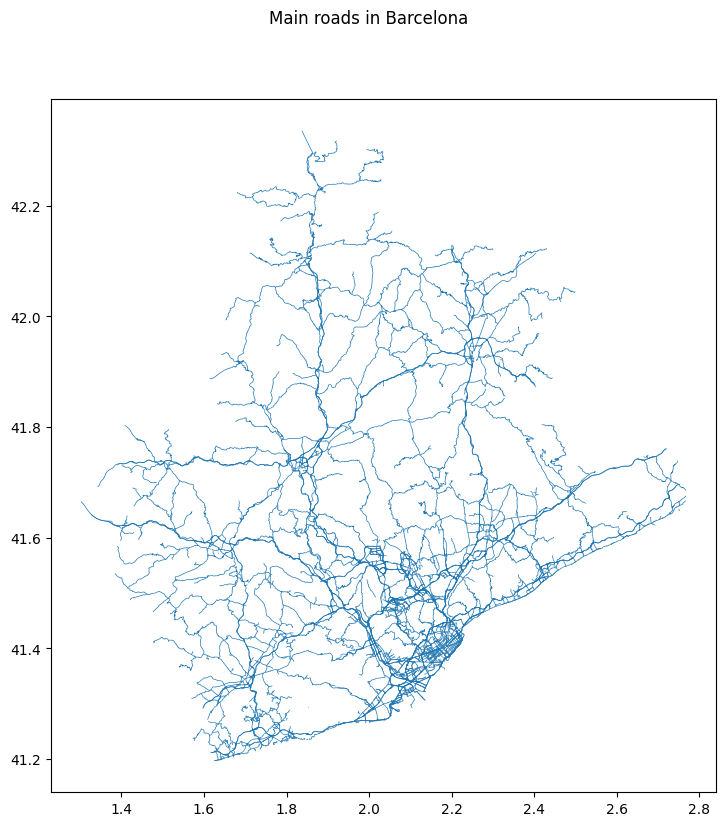

In [ ]:
Malaga_Roadnetwork = gdf_esp_mainroad[gdf_esp_mainroad.intersects(Malaga_shp)]
Malaga_Roadnetwork = Malaga_Roadnetwork.rename(columns={'geometry': 'Geometry_LineString'})
Malaga_Roadnetwork = Malaga_Roadnetwork.set_geometry('Geometry_LineString')
fig, ax = plt.subplots(figsize=(12, 9))
Malaga_Roadnetwork.plot(ax=ax, linewidth=0.5)
fig.suptitle('Main roads in Malaga')
plt.show()

Barcelona_Roadnetwork = gdf_esp_mainroad[gdf_esp_mainroad.intersects(Barcelona_shp)]
Barcelona_Roadnetwork = Barcelona_Roadnetwork.rename(columns={'geometry': 'Geometry_LineString'})
Barcelona_Roadnetwork = Barcelona_Roadnetwork.set_geometry('Geometry_LineString')
fig, ax = plt.subplots(figsize=(12, 9))
Barcelona_Roadnetwork.plot(ax=ax, linewidth=0.5)
fig.suptitle('Main roads in Barcelona')
plt.show()

2.1 Malaga

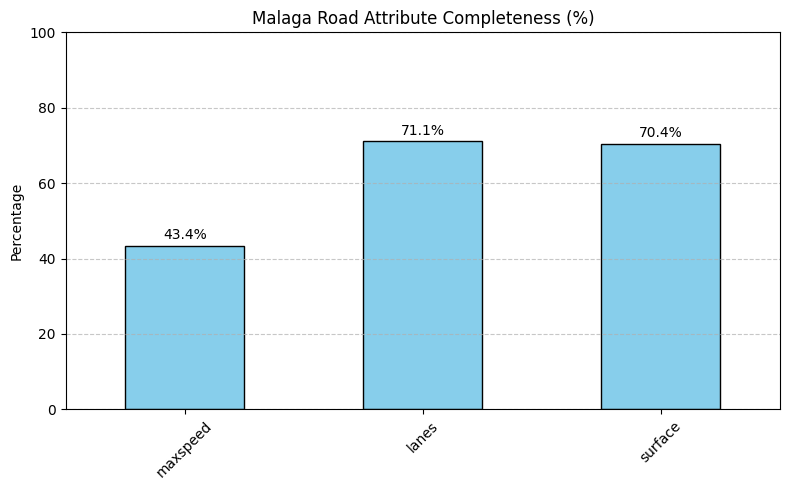

In [ ]:
# Assign DataFrame for easier handling
df_Malaga = Malaga_Roadnetwork
df_Malaga['ID'] = pd.RangeIndex(start=1, stop=len(df_Malaga) + 1)  # Create a new 'id' column
df_Malaga = df_Malaga.set_index('ID')  # Set 'id' as the index

# Columns of interest
columns = ['maxspeed', 'lanes', 'surface']

# Calculate completeness (non-null percentage)
completeness = df_Malaga[columns].notnull().mean() * 100

# Plot
plt.figure(figsize=(8, 5))
completeness.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Malaga Road Attribute Completeness (%)')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for idx, val in enumerate (completeness):
    plt.text(idx, val + 1, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df_Malaga['Geometry_Midpoint'] = df_Malaga.geometry.apply(lambda geom: geom.interpolate(0.5, normalized=True))

In [ ]:
def calculate_sinuosity(geometry):
    # Calculate the actual road distance (length of the LineString)
    road_distance = geometry.length

    # Calculate the Euclidean distance (straight line distance between the first and last points)
    start_point = Point(geometry.coords[0])
    end_point = Point(geometry.coords[-1])
    euclidean_distance = start_point.distance(end_point)

    # Avoid division by zero by adding a small value to the denominator
    sinuosity = road_distance / (euclidean_distance + 1e-100)  # Added 1e-100 to avoid ZeroDivisionError

    return sinuosity

# Apply the function to each geometry in the GeoDataFrame
df_Malaga['sinuosity'] = df_Malaga['Geometry_LineString'].apply(calculate_sinuosity)

In [ ]:
Slope_Malaga = '/content/Slope_Malaga.tif'
Slope_Malaga_raster = rxr.open_rasterio(Slope_Malaga)  # Open the raster file with rioxarray

# Get the CRS from the opened raster
raster_crs = Slope_Malaga_raster.rio.crs

# Ensure roads are in a projected CRS for accurate buffering (meters)
df_Malaga = df_Malaga.to_crs(raster_crs)  # Reprojecting the raster to the specified CRS

# Run zonal stats
stats = zonal_stats(df_Malaga['Geometry_LineString'], Slope_Malaga, stats=['mean'], categorical=True)

# Add majority land cover type to roads GeoDataFrame
df_Malaga['Average_Slope'] = [s['mean'] for s in stats]

In [ ]:
CLC_Malaga = '/content/CLC_Malaga.tif'
CLC_Malaga_raster = rxr.open_rasterio(CLC_Malaga)

# Get the CRS from the opened raster
raster_crs = CLC_Malaga_raster.rio.crs

# Ensure roads are in a projected CRS for accurate buffering (meters)
df_Malaga = df_Malaga.to_crs(raster_crs)  # Reprojecting the raster to the specified CRS

# Run zonal stats
stats = zonal_stats(df_Malaga['Geometry_LineString'], CLC_Malaga, stats=['majority'], categorical=True)

# Add majority land cover type to GeoDataFrame
df_Malaga['CLC_Merged_Majority'] = [s['majority'] for s in stats]

In [ ]:
# Load the regional GDP data (assuming a shapefile for this example)
gdf_gdp = gpd.read_file("/content/Spain_NUTS3_GDP.zip")  # Replace with your file path

# Before accessing df_Malaga.crs, set the active geometry column:
df_Malaga = df_Malaga.set_geometry('Geometry_Midpoint') # Set 'Midpoint' as the active geometry column

# Now you can access the CRS:
gdf_gdp = gdf_gdp.to_crs(df_Malaga.crs)  # Use the CRS of df_Malaga

# Define a function to get GDP for a given point
def get_gdp(point):
    """Returns the GDP value of the region containing the given point."""
    for index, row in gdf_gdp.iterrows():
        if row.geometry.contains(point):
            return row['OBS_VALUE']  # Replace 'GDP_column' with your GDP column name
    return None  # Return None if point not found in any region

# Apply the function to get GDP for each road
df_Malaga['GDP'] = df_Malaga['Geometry_Midpoint'].apply(get_gdp)

In [ ]:
Pop_Density_Malaga = '/content/Pop_Density.tif'
Pop_Density_Malaga_raster = rxr.open_rasterio(Pop_Density_Malaga) # Open the raster file with rioxarray

# Get the CRS from the opened raster
raster_crs = Pop_Density_Malaga_raster.rio.crs

# Ensure roads are in a projected CRS for accurate buffering (meters)
df_Malaga = df_Malaga.to_crs(raster_crs)  # Reprojecting the raster to the specified CRS

# Run zonal stats
stats = zonal_stats(df_Malaga['Geometry_LineString'], Pop_Density_Malaga, stats=['mean'], categorical=True)

# Add majority land cover type to roads GeoDataFrame
df_Malaga['Average_Pop_Density'] = [s['mean'] for s in stats]

In [ ]:
df_Malaga

,osm_id,highway,name,maxspeed,lanes,surface,Geometry_LineString,Geometry_Midpoint,sinuosity,Average_Slope,CLC_Merged_Majority,GDP,Average_Pop_Density
ID,,,,,,,,,,,,,
1,4049733,motorway,Autovía de Estación de Salinas a Villanueva de...,120,2,asphalt,"LINESTRING (3048902.37 1680681.99, 3048896.823...",POINT (3048882.67 1680586.812),1.001917,1.564524,3.0,17357.4,203.890198
2,4049778,motorway,Autopista del Mediterráneo,100,2,asphalt,"LINESTRING (2999259.01 1620476.522, 2999162.43...",POINT (2998976.59 1620453.445),1.004106,9.695560,1.0,32619.8,887.778748
3,4049784,primary,None,50,3,asphalt,"LINESTRING (3024714.044 1635643.331, 3024721.9...",POINT (3024721.456 1635632.782),1.002508,1.189768,2.0,32619.8,6736.685059
4,4053813,secondary,Avenida de Málaga,None,None,asphalt,"LINESTRING (2966366.782 1654666.854, 2966361.9...",POINT (2966300.467 1654587.578),1.004336,1.477047,2.0,32619.8,2860.814453
5,4053815,secondary,None,None,2,asphalt,"LINESTRING (2976853.407 1665027.694, 2976850.9...",POINT (2976081.65 1664362.07),1.472875,8.556106,3.0,32619.8,17.304584
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16110,1384278227,secondary,None,None,1,asphalt,"LINESTRING (3000789.166 1693009.414, 3000783 1...",POINT (3000773.873 1692997.373),1.000676,2.177982,3.0,32619.8,85.279060
16111,1384278229,secondary,None,None,1,asphalt,"LINESTRING (3001391.563 1693179.641, 3001414.7...",POINT (3001410.515 1693179.609),1.002011,1.784331,3.0,32619.8,68.579025
16112,1384278230,secondary,None,None,1,asphalt,"LINESTRING (3001427.711 1693200.686, 3001414.2...",POINT (3001410.292 1693188.41),1.005173,1.784331,3.0,32619.8,68.579025


In [ ]:
df_Malaga.to_csv('Dataset_Malaga.csv')

df_Malaga = df_Malaga.drop(columns=['Geometry_LineString'])
df_Malaga = df_Malaga.rename(columns={'Geometry_Midpoint': 'geometry'})
df_Malaga.to_file('Dataset_Malaga.geojson', driver='GeoJSON')

INFO:pyogrio._io:Created 16,114 records


2.2. Barcelona

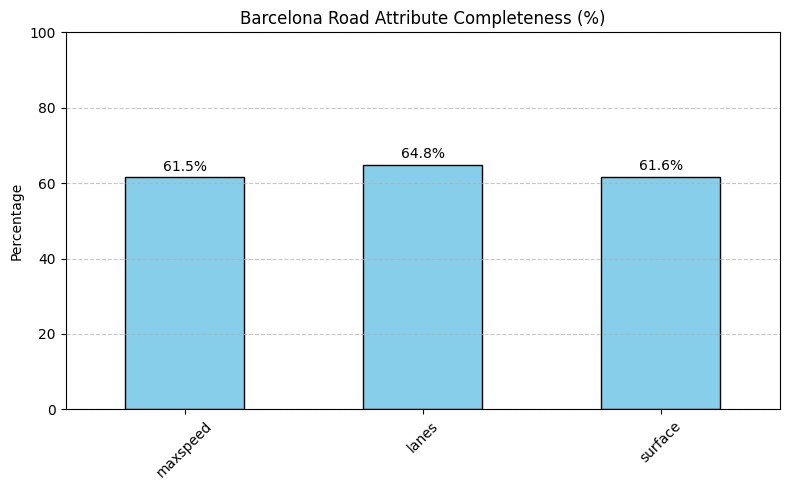

In [ ]:
# Assign DataFrame for easier handling
df_Barcelona = Barcelona_Roadnetwork
df_Barcelona['ID'] = pd.RangeIndex(start=1, stop=len(df_Barcelona) + 1)  # Create a new 'id' column
df_Barcelona = df_Barcelona.set_index('ID')  # Set 'id' as the index

# Columns of interest
columns = ['maxspeed', 'lanes', 'surface']

# Calculate completeness (non-null percentage)
completeness = df_Barcelona[columns].notnull().mean() * 100

# Plot
plt.figure(figsize=(8, 5))
completeness.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Barcelona Road Attribute Completeness (%)')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for idx, val in enumerate (completeness):
    plt.text(idx, val + 1, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
df_Barcelona['Geometry_Midpoint'] = df_Barcelona.geometry.apply(lambda geom: geom.interpolate(0.5, normalized=True))

In [ ]:
def calculate_sinuosity(geometry):
    # Calculate the actual road distance (length of the LineString)
    road_distance = geometry.length

    # Calculate the Euclidean distance (straight line distance between the first and last points)
    start_point = Point(geometry.coords[0])
    end_point = Point(geometry.coords[-1])
    euclidean_distance = start_point.distance(end_point)

    # Avoid division by zero by adding a small value to the denominator
    sinuosity = road_distance / (euclidean_distance + 1e-100)  # Added 1e-100 to avoid ZeroDivisionError

    return sinuosity

# Apply the function to each geometry in the GeoDataFrame
df_Barcelona['sinuosity'] = df_Barcelona['Geometry_LineString'].apply(calculate_sinuosity)

In [ ]:
Slope_Barcelona = '/content/Slope_Barcelona.tif'
Slope_Barcelona_raster = rxr.open_rasterio(Slope_Barcelona)  # Open the raster file with rioxarray

# Get the CRS from the opened raster
raster_crs = Slope_Barcelona_raster.rio.crs

# Ensure roads are in a projected CRS for accurate buffering (meters)
df_Barcelona = df_Barcelona.to_crs(raster_crs)  # Reprojecting the raster to the specified CRS

# Run zonal stats
stats = zonal_stats(df_Barcelona['Geometry_LineString'], Slope_Barcelona, stats=['mean'], categorical=True)

# Add majority land cover type to roads GeoDataFrame
df_Barcelona['Average_Slope'] = [s['mean'] for s in stats]

In [ ]:
CLC_Barcelona = '/content/CLC_Barcelona.tif'
CLC_Barcelona_raster = rxr.open_rasterio(CLC_Barcelona)  # Open the raster file with rioxarray

# Get the CRS from the opened raster
raster_crs = CLC_Barcelona_raster.rio.crs

# Ensure roads are in a projected CRS for accurate buffering (meters)
df_Barcelona = df_Barcelona.to_crs(raster_crs)  # Reprojecting the raster to the specified CRS

# Run zonal stats
stats = zonal_stats(df_Barcelona['Geometry_LineString'], CLC_Barcelona, stats=['majority'], categorical=True)

# Add majority land cover type to GeoDataFrame
df_Barcelona['CLC_Merged_Majority'] = [s['majority'] for s in stats]

In [ ]:
# Load the regional GDP data (assuming a shapefile for this example)
gdf_gdp = gpd.read_file("/content/Spain_NUTS3_GDP.zip")  # Replace with your file path

# Before accessing df_Barcelona.crs, set the active geometry column:
df_Barcelona = df_Barcelona.set_geometry('Geometry_Midpoint') # Set 'Midpoint' as the active geometry column

# Now you can access the CRS:
gdf_gdp = gdf_gdp.to_crs(df_Barcelona.crs)  # Use the CRS of df_Barcelona

# Define a function to get GDP for a given point
def get_gdp(point):
    """Returns the GDP value of the region containing the given point."""
    for index, row in gdf_gdp.iterrows():
        if row.geometry.contains(point):
            return row['OBS_VALUE']  # Replace 'GDP_column' with your GDP column name
    return None  # Return None if point not found in any region

# Apply the function to get GDP for each road
df_Barcelona['GDP'] = df_Barcelona['Geometry_Midpoint'].apply(get_gdp)

In [ ]:
Pop_Density_Barcelona = '/content/Pop_Density.tif'
Pop_Density_Barcelona_raster = rxr.open_rasterio(Pop_Density_Barcelona) # Open the raster file with rioxarray

# Get the CRS from the opened raster
raster_crs = Pop_Density_Barcelona_raster.rio.crs

# Ensure roads are in a projected CRS for accurate buffering (meters)
df_Barcelona = df_Barcelona.to_crs(raster_crs)  # Reprojecting the raster to the specified CRS

# Run zonal stats
stats = zonal_stats(df_Barcelona['Geometry_LineString'], Pop_Density_Barcelona, stats=['mean'], categorical=True)

# Add majority land cover type to roads GeoDataFrame
df_Barcelona['Average_Pop_Density'] = [s['mean'] for s in stats]

In [ ]:
df_Barcelona

,osm_id,highway,name,maxspeed,lanes,surface,Geometry_LineString,Geometry_Midpoint,sinuosity,Average_Slope,CLC_Merged_Majority,GDP,Average_Pop_Density
ID,,,,,,,,,,,,,
1,4079460,tertiary,Carrer del Número 100,50,2,None,"LINESTRING (3659611.068 2059076.068, 3659611.9...",POINT (3659597.892 2058960.361),1.147854,0.000000,2.0,NaN,4416.084961
2,4079509,tertiary,Carrer de Pepe Rubianes,30,2,asphalt,"LINESTRING (3666154.505 2064643.7, 3666169.686...",POINT (3666317.24 2064673.583),1.000029,1.102028,1.0,NaN,17112.841797
3,4079520,secondary,Plaça del Portal de la Pau,50,4,asphalt,"LINESTRING (3665246.055 2064451.89, 3665252.21...",POINT (3665271.38 2064457.22),1.045145,1.508722,2.0,173917.4,18406.839844
4,4743375,tertiary,Passeig de Miramar,30,2,asphalt,"LINESTRING (3664180.35 2064009.039, 3664180.65...",POINT (3664180.501 2064009.557),1.000000,5.125113,1.0,173917.4,16022.279297
5,4744944,secondary,Carrer de París,50,3,None,"LINESTRING (3662641.963 2066045.671, 3662656.3...",POINT (3662792.653 2066165.923),1.000070,1.516573,1.0,173917.4,25089.613281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42456,1385051291,tertiary,None,None,None,None,"LINESTRING (3672027.924 2123403.6, 3672027.363...",POINT (3672025.327 2123409.255),1.025168,4.386331,1.0,173917.4,869.286621
42457,1385051292,tertiary,None,None,None,None,"LINESTRING (3672025.44 2123391.455, 3672026.56...",POINT (3672027.961 2123397.156),1.050618,4.602526,1.0,173917.4,869.286621
42458,1385051293,tertiary,None,None,None,None,"LINESTRING (3672022.887 2123388.725, 3672023.8...",POINT (3672024.219 2123389.998),1.002437,4.602526,3.0,173917.4,869.286621


In [ ]:
df_Barcelona.to_csv('Dataset_Barcelona.csv')

df_Barcelona = df_Barcelona.drop(columns=['Geometry_LineString'])
df_Barcelona = df_Barcelona.rename(columns={'Geometry_Midpoint': 'geometry'})
df_Barcelona.to_file('Dataset_Barcelona.geojson', driver='GeoJSON')

INFO:pyogrio._io:Created 42,460 records
